In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Generate Simulation Values

Here we generate the simulation values which are stored in the "bal" (balance) matrix. Each row is an iteration and each column is the balance for that year. Each iteration is initialized at $6B. Annual returns, distributions (what the fund donates), and contributions (what Michael puts in) are values sampled from normal distributions. 

The balance for successive years is defined iteratively for iteration-$i$ and year-$y$ as 
### $b_{i,y} = b_{i,y-1} (1 + r_{i,y})(1 - d_{i,y}) + c_{i,y}$ 

where $b\in B$ is the balance matrix, $r\in R$ is the returns matrix, $d\in D$ is the distribution matrix and $c\in C$ is the contributions matrix.

In [107]:
# Number of iterations and years
itr = 50000
yrs = 20

# Distribution parameters
ann_ret = 0.07
ann_vol = 0.10

ann_dist = 0.10 
dist_std_dev = 0.01

ann_contr = 50000000
contr_std_dev = 10000000

# Populate returns, distributions, contributions amounts
returns = pd.DataFrame( np.random.normal(loc=ann_ret, scale=ann_vol, size=(itr, yrs)) )
dist = pd.DataFrame( np.random.normal(loc=ann_dist, scale=dist_std_dev, size=(itr, yrs)) )
contr = pd.DataFrame( np.random.normal(loc=ann_contr, scale=contr_std_dev, size=(itr, yrs)) )

# Initialize balance matrix with $6E9 as initial amount
bal = np.zeros((itr,yrs))
bal[:,0] = 6000000000
bal = pd.DataFrame(bal)

# Initialize distribution tab matrix
dist_tab = pd.DataFrame( np.zeros((itr,yrs)) )

# Simulate 20 years
for i in range(0,itr):
    for y in range(1,yrs):
        #bal.iloc[i][y] = bal.iloc[i][y-1] + bal.iloc[i][y-1] * (returns.iloc[i][y-1] - dist.iloc[i][y] ) + contr.iloc[i][y]
        bal.iloc[i][y] = bal.iloc[i][y-1] * (1 + returns.iloc[i][y]) * (1 - dist.iloc[i][y]) + contr.iloc[i][y]
        dist_tab.iloc[i][y] = bal.iloc[i][y-1] * dist.iloc[i][y]

# Record sum of all distributions given
dist_tab['Sum'] = dist_tab.sum(axis=1)

In [108]:
bal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.000000e+09,5.658372e+09,6.299364e+09,5.964990e+09,5.989787e+09,5.977369e+09,5.918288e+09,5.044752e+09,4.283888e+09,3.811266e+09,4.370469e+09,4.760756e+09,4.578709e+09,4.722727e+09,5.367092e+09,4.698402e+09,4.716483e+09,3.900927e+09,3.594450e+09,3.480349e+09
1,6.000000e+09,6.491964e+09,6.134767e+09,5.929500e+09,6.027694e+09,6.310289e+09,6.681262e+09,6.438207e+09,6.612859e+09,6.960299e+09,6.536688e+09,6.845384e+09,6.956883e+09,6.911449e+09,7.071150e+09,5.338351e+09,5.466239e+09,4.840278e+09,4.761676e+09,5.049022e+09
2,6.000000e+09,6.072730e+09,5.520192e+09,5.489542e+09,5.602738e+09,6.444474e+09,7.002081e+09,7.131025e+09,7.525388e+09,6.435093e+09,6.411455e+09,5.560040e+09,5.244541e+09,5.413253e+09,5.439503e+09,5.502766e+09,4.896791e+09,4.506564e+09,4.709031e+09,5.676317e+09
3,6.000000e+09,5.535817e+09,6.097590e+09,6.050097e+09,6.440151e+09,7.610832e+09,6.791413e+09,7.030408e+09,6.641483e+09,5.846491e+09,5.273155e+09,5.787678e+09,5.404244e+09,6.220310e+09,6.159956e+09,6.724830e+09,6.072575e+09,6.464722e+09,5.622517e+09,5.839760e+09
4,6.000000e+09,5.353899e+09,4.765977e+09,4.652322e+09,3.737518e+09,2.933655e+09,2.374619e+09,2.468351e+09,2.208521e+09,2.100489e+09,2.079786e+09,2.190357e+09,2.170297e+09,2.249852e+09,2.104817e+09,1.932087e+09,2.040559e+09,2.009494e+09,1.983413e+09,2.093590e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6.000000e+09,5.143810e+09,5.498436e+09,5.028475e+09,5.607012e+09,5.631793e+09,6.202880e+09,5.765815e+09,6.118964e+09,4.964907e+09,5.272509e+09,6.187663e+09,5.718829e+09,6.605591e+09,6.617655e+09,6.148060e+09,6.136722e+09,4.540143e+09,4.232863e+09,4.083094e+09
49996,6.000000e+09,4.893344e+09,5.419185e+09,5.211389e+09,5.290990e+09,5.513063e+09,6.197607e+09,5.482127e+09,4.968646e+09,6.264705e+09,6.870178e+09,6.553672e+09,6.633212e+09,6.275467e+09,6.256409e+09,5.853651e+09,5.223599e+09,5.466554e+09,5.585069e+09,5.222226e+09
49997,6.000000e+09,5.999899e+09,6.048779e+09,6.121701e+09,5.645708e+09,6.601412e+09,6.186038e+09,6.862752e+09,6.191366e+09,6.117206e+09,4.777425e+09,4.159469e+09,4.428190e+09,4.645175e+09,4.564613e+09,4.249233e+09,3.749619e+09,3.549477e+09,3.826719e+09,3.778834e+09
49998,6.000000e+09,5.761422e+09,5.390527e+09,4.211617e+09,4.363370e+09,4.476296e+09,5.197208e+09,4.854717e+09,4.691595e+09,4.425588e+09,3.868261e+09,3.519810e+09,3.693315e+09,3.809236e+09,4.055211e+09,4.371444e+09,4.037801e+09,4.264353e+09,4.338962e+09,4.243007e+09


# Plot Distributions of Simulation Values

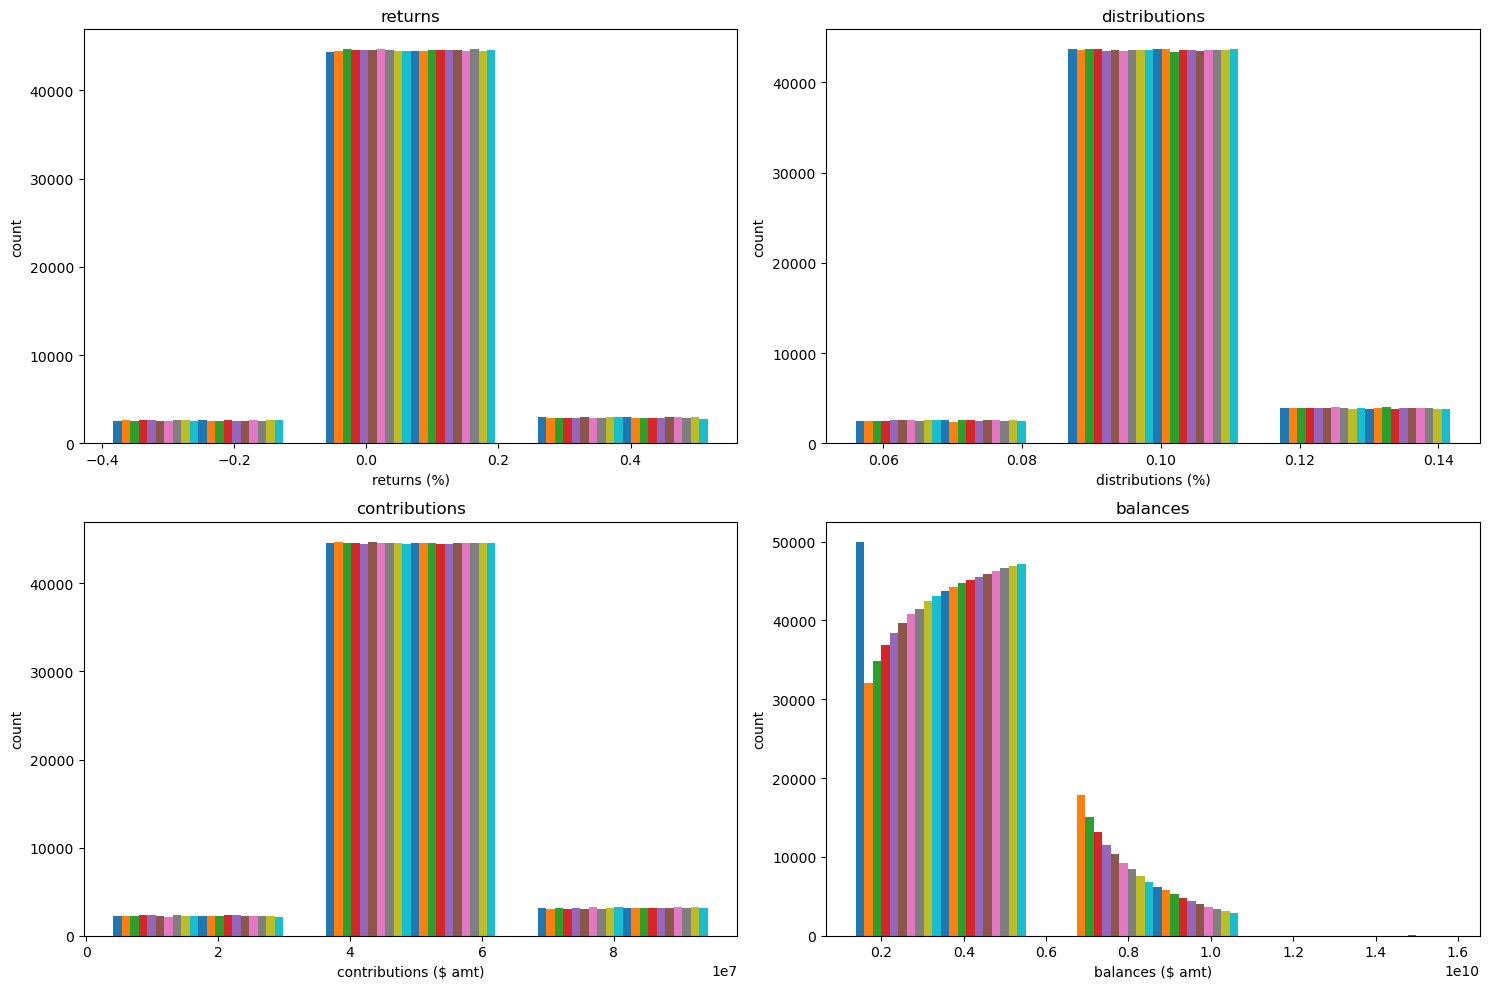

In [109]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for first quadrant
axes[0, 0].hist(returns, bins=3)
axes[0, 0].set_title('returns')
axes[0, 0].set_xlabel('returns (%)')
axes[0, 0].set_ylabel('count')

# Plot for second quadrant
axes[0, 1].hist(dist, bins=3)
axes[0, 1].set_title('distributions')
axes[0, 1].set_xlabel('distributions (%)')
axes[0, 1].set_ylabel('count')

# Plot for third quadrant
axes[1, 0].hist(contr, bins=3)
axes[1, 0].set_title('contributions')
axes[1, 0].set_xlabel('contributions ($ amt)')
axes[1, 0].set_ylabel('count')

# Plot for fourth quadrant
axes[1, 1].hist(bal, bins=3)
axes[1, 1].set_title('balances')
axes[1, 1].set_xlabel('balances ($ amt)')
axes[1, 1].set_ylabel('count')

# Adjust layout
plt.tight_layout()
plt.show()

In [110]:
bal.values.min(), bal.values.max()

(864045936.2243973, 16330601620.332241)

# Plot Portfolio Trajectories

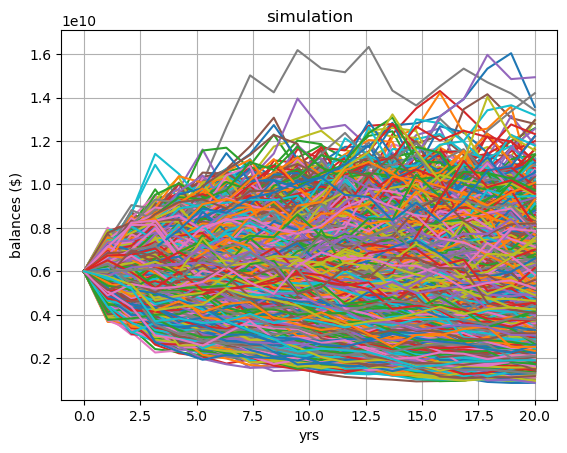

In [111]:
# Assign x and y
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.T)

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('simulation')
plt.grid(True)  # Optional: Add grid

plt.show()

# See Individual Iteration

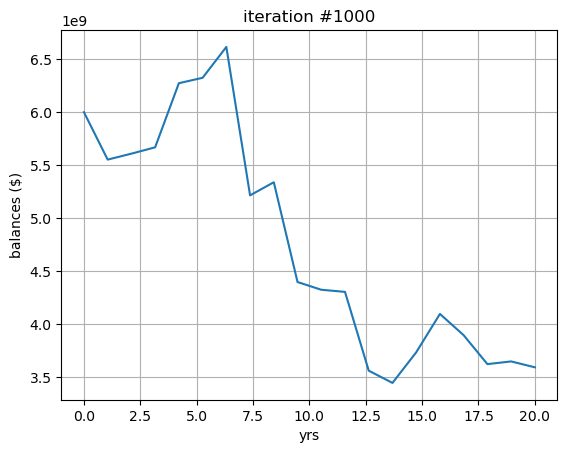

In [112]:
# Assign x and y
sim_no = 1000
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.iloc[sim_no])

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('iteration #' + str(sim_no))
plt.grid(True)  # Optional: Add grid

plt.show()

# Percentile Breakdown of Portfolios

In [113]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(bal.iloc[:, -1], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")

Percentiles [25, 50, 90]: [2.63153479e+09 3.37439579e+09 5.39686461e+09]


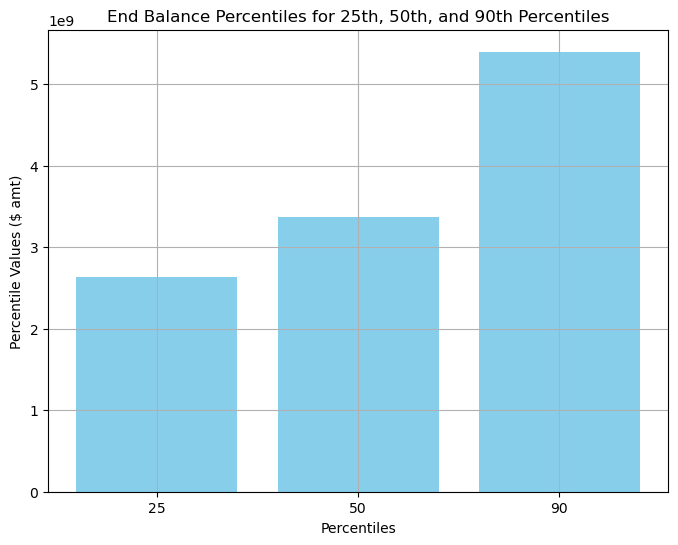

In [114]:
# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

In [115]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(dist_tab['Sum'], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")

Percentiles [25, 50, 90]: [7.70218507e+09 8.77490472e+09 1.13147642e+10]


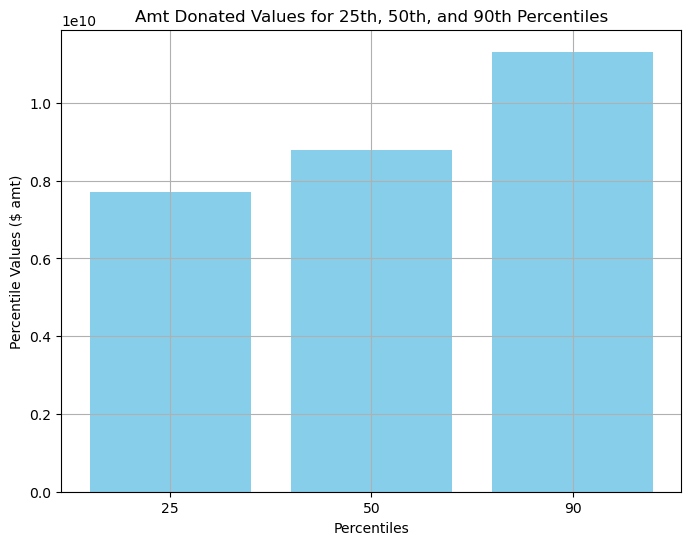

In [116]:
# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('Amt Donated Values for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()